<a href="https://colab.research.google.com/github/Berk3459/A-B-testing-for-retail-marketing-campaign/blob/main/dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#veri setini yükleyelim
df = pd.read_csv("/content/customer_shopping_data.csv (1).zip")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df["category"].value_counts()

,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'],dayfirst=True)

In [ ]:
df.index = df['invoice_date']

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.shape

(99457, 10)

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
invoice_date,,,,,,,,,,
2021-01-01,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
2021-01-01,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
2021-01-01,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
2021-01-01,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
2021-01-01,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park


In [ ]:
# verisetimizdeki satış adetlerini günlük olarak gruplayalım
Total_sales = df.groupby(df.index)["quantity"].sum()
ts = Total_sales.to_frame()
ts.head()


,quantity
invoice_date,
2021-01-01,333
2021-01-02,387
2021-01-03,405
2021-01-04,379
2021-01-05,374


In [ ]:
#veri setimizin zaman aralığı
print(f"İlk tarih :{df.index.min()}",end="\n")
print(f"son tarih :{df.index.max()}")

İlk tarih :2021-01-01 00:00:00
son tarih :2023-03-08 00:00:00


verisetinin son 30 gününü test olarak kalan verileri train olarak ayıralım

In [ ]:
train = ts.loc["2021-01-01":"2023-02-06"]

In [ ]:
test = ts.loc["2023-02-07":]

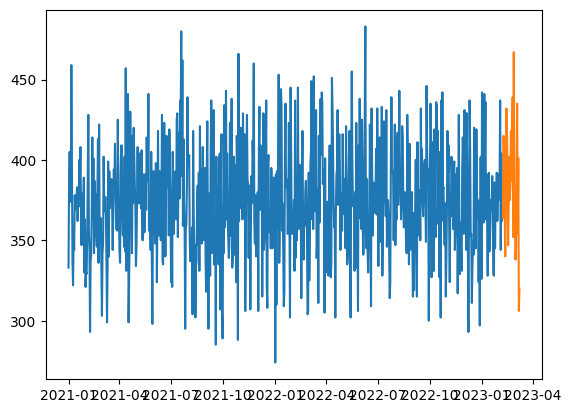

In [ ]:
plt.plot(train)
plt.plot(test)
plt.show()

# Zaman serisi modelleri

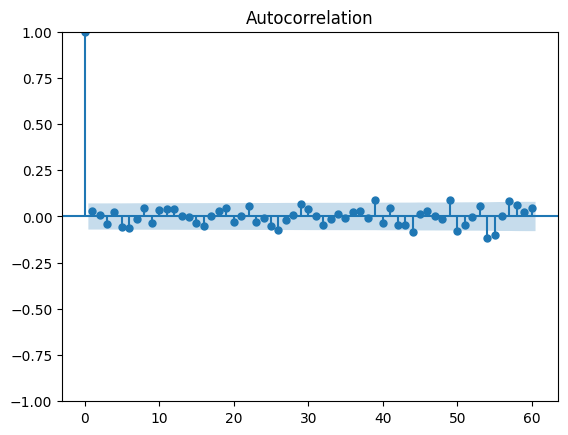

In [ ]:
acf = plot_acf(train,lags=30)
plt.show(acf)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#arıma modeli oluşturalım
model = ARIMA(train, order=(42,0,2),freq="d").fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
gelecek = model.predict(start = "2023-02-07",end = "2023-03-08")
print(gelecek)

2023-02-07    370.559365
2023-02-08    376.688574
2023-02-09    371.356282
2023-02-10    376.254426
2023-02-11    372.317539
2023-02-12    375.888792
2023-02-13    372.957414
2023-02-14    375.567316
2023-02-15    373.392138
2023-02-16    375.304748
2023-02-17    373.694575
2023-02-18    375.098801
2023-02-19    373.908747
2023-02-20    374.940995
2023-02-21    374.062350
2023-02-22    374.821776
2023-02-23    374.173490
2023-02-24    374.732504
2023-02-25    374.254393
2023-02-26    374.666030
2023-02-27    374.313527
2023-02-28    374.616712
2023-03-01    374.356868
2023-03-02    374.580209
2023-03-03    374.388691
2023-03-04    374.553232
2023-03-05    374.412085
2023-03-06    374.533315
2023-03-07    374.429297
2023-03-08    374.518620
Freq: D, Name: predicted_mean, dtype: float64


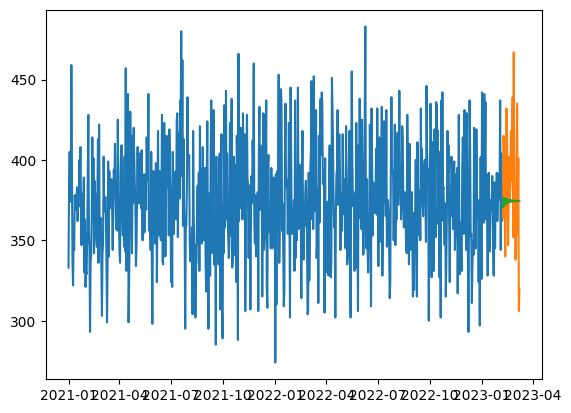

In [ ]:
plt.plot(train,label="gerçek veri")
plt.plot(test,label="test veri")
plt.plot(gelecek,label="tahmin veri")

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
model2 = auto_arima(train,trace=True,seasonal=False)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11275.147, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10414.003, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.00 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=9813.491, Time=1.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.95 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=9484.099, Time=2.77 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=2.94 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=9194.350, Time=2.42 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=7672.065, Time=3.15 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=2.42 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=2.43 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=4.42 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.79 sec
 ARIMA(2,0,

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
gelecek2 = model2.predict(30)
print(gelecek2)

2023-02-07    374.474576
2023-02-08    374.474576
2023-02-09    374.474576
2023-02-10    374.474576
2023-02-11    374.474576
2023-02-12    374.474576
2023-02-13    374.474576
2023-02-14    374.474576
2023-02-15    374.474576
2023-02-16    374.474576
2023-02-17    374.474576
2023-02-18    374.474576
2023-02-19    374.474576
2023-02-20    374.474576
2023-02-21    374.474576
2023-02-22    374.474576
2023-02-23    374.474576
2023-02-24    374.474576
2023-02-25    374.474576
2023-02-26    374.474576
2023-02-27    374.474576
2023-02-28    374.474576
2023-03-01    374.474576
2023-03-02    374.474576
2023-03-03    374.474576
2023-03-04    374.474576
2023-03-05    374.474576
2023-03-06    374.474576
2023-03-07    374.474576
2023-03-08    374.474576
Freq: D, dtype: float64


In [ ]:
model3 = auto_arima(train,trace=True,seasonal=True,m = 3,d=1)
model3

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=inf, Time=11.67 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=8141.276, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=7934.985, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=8139.278, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[3] intercept   : AIC=7934.185, Time=0.11 sec
 ARIMA(1,1,0)(0,0,1)[3] intercept   : AIC=7934.761, Time=0.33 sec
 ARIMA(1,1,0)(1,0,1)[3] intercept   : AIC=7932.664, Time=2.79 sec
 ARIMA(1,1,0)(2,0,1)[3] intercept   : AIC=7932.310, Time=3.09 sec
 ARIMA(1,1,0)(2,0,0)[3] intercept   : AIC=7932.411, Time=1.32 sec
 ARIMA(1,1,0)(2,0,2)[3] intercept   : AIC=7933.608, Time=3.22 sec
 ARIMA(1,1,0)(1,0,2)[3] intercept   : AIC=7932.601, Time=2.01 sec
 ARIMA(0,1,0)(2,0,1)[3] intercept   : AIC=8141.399, Time=1.88 sec
 ARIMA(2,1,0)(2,0,1)[3] intercept   : AIC=inf, Time=6.14 sec
 ARIMA(1,1,1)(2,0,1)[3] intercept   : AIC=inf, 

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(2, 0, 1, 3),
      suppress_warnings=True, with_intercept=False)

In [ ]:
gelecek3 = model3.predict(30)
print(gelecek3)

2023-02-07    371.021499
2023-02-08    371.793923
2023-02-09    378.063815
2023-02-10    373.381535
2023-02-11    374.563856
2023-02-12    376.515107
2023-02-13    375.052792
2023-02-14    375.689318
2023-02-15    375.897708
2023-02-16    375.710706
2023-02-17    375.846984
2023-02-18    375.808324
2023-02-19    375.828995
2023-02-20    375.841471
2023-02-21    375.810818
2023-02-22    375.832271
2023-02-23    375.827411
2023-02-24    375.818455
2023-02-25    375.825197
2023-02-26    375.822530
2023-02-27    375.821147
2023-02-28    375.822292
2023-03-01    375.821592
2023-03-02    375.821672
2023-03-03    375.821652
2023-03-04    375.821565
2023-03-05    375.821689
2023-03-06    375.821604
2023-03-07    375.821618
2023-03-08    375.821661
Freq: D, dtype: float64


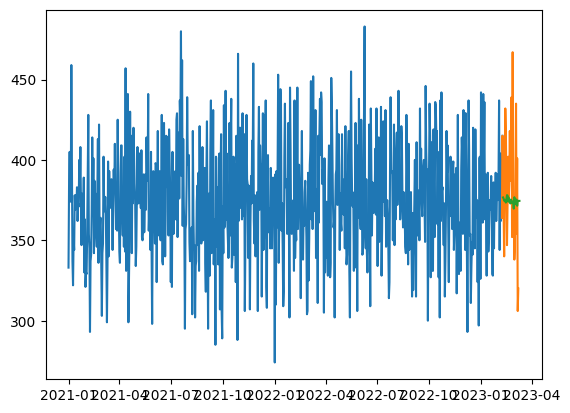

In [ ]:
plt.plot(train,label="gerçek veri")
plt.plot(test,label="test veri")
plt.plot(gelecek,label="tahmin veri")

In [ ]:

model4 = auto_arima(train,trace=True,seasonal=True,m = 5,d=1)
model4

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=inf, Time=7.95 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=8141.276, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=7935.279, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=8139.278, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[5] intercept   : AIC=7934.185, Time=0.09 sec
 ARIMA(1,1,0)(0,0,1)[5] intercept   : AIC=7935.288, Time=0.32 sec
 ARIMA(1,1,0)(1,0,1)[5] intercept   : AIC=7937.289, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[5] intercept   : AIC=7867.137, Time=0.67 sec
 ARIMA(2,1,0)(1,0,0)[5] intercept   : AIC=7866.627, Time=0.53 sec
 ARIMA(2,1,0)(2,0,0)[5] intercept   : AIC=7868.325, Time=0.71 sec
 ARIMA(2,1,0)(1,0,1)[5] intercept   : AIC=7867.792, Time=1.15 sec
 ARIMA(2,1,0)(0,0,1)[5] intercept   : AIC=7866.718, Time=0.36 sec
 ARIMA(2,1,0)(2,0,1)[5] intercept   : AIC=7869.750, Time=6.22 sec
 ARIMA(3,1,0)(1,0,0)[5] intercept   : AIC=7

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(1, 0, 1, 5),
      suppress_warnings=True, with_intercept=False)

In [ ]:
gelecek4 = model4.predict(30)
print(gelecek4)

2023-02-07    367.937481
2023-02-08    386.202614
2023-02-09    371.556906
2023-02-10    377.054751
2023-02-11    373.826352
2023-02-12    380.229903
2023-02-13    370.915547
2023-02-14    377.764482
2023-02-15    375.994404
2023-02-16    377.573010
2023-02-17    373.153659
2023-02-18    380.112238
2023-02-19    374.797142
2023-02-20    376.097800
2023-02-21    374.923346
2023-02-22    378.537970
2023-02-23    372.652936
2023-02-24    377.194616
2023-02-25    376.104049
2023-02-26    377.081366
2023-02-27    373.986419
2023-02-28    379.054768
2023-03-01    375.141980
2023-03-02    376.076395
2023-03-03    375.237855
2023-03-04    377.906098
2023-03-05    373.534576
2023-03-06    376.908966
2023-03-07    376.103747
2023-03-08    376.826792
Freq: D, dtype: float64


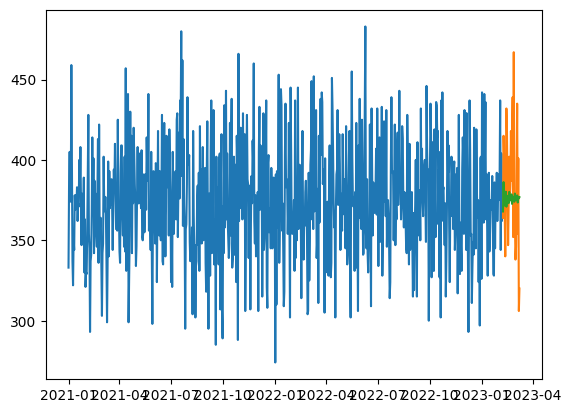

In [ ]:
plt.plot(train,label="gerçek veri")
plt.plot(test,label="test veri")
plt.plot(gelecek4,label="tahmin veri")

# Modellerin Değerlendirilmesi

In [ ]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

In [ ]:

print(f"rmse değeri : {rmse(test["quantity"], gelecek)}",end = "\n")
print(f"mse değeri : {mean_squared_error(test["quantity"], gelecek)})")

rmse değeri : 37.558170656851104
mse değeri : 1410.6161830891513)


In [ ]:
print(f"rmse değeri : {rmse(test["quantity"], gelecek2)}",end = "\n")
print(f"mse değeri : {mean_squared_error(test["quantity"], gelecek2)})")

rmse değeri : 37.558170656851104
mse değeri : 1410.6161830891513)


In [ ]:
print(f"rmse değeri : {rmse(test["quantity"], gelecek3)}",end = "\n")
print(f"mse değeri : {mean_squared_error(test["quantity"], gelecek3)})")

rmse değeri : 37.32144329767406
mse değeri : 1392.8901298214998)


In [ ]:
print(f"rmse değeri : {rmse(test["quantity"], gelecek4)}",end = "\n")
print(f"mse değeri : {mean_squared_error(test["quantity"], gelecek4)})")

rmse değeri : 36.93269342569765
mse değeri : 1364.0238436765706)


# LSTM Model

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(ts)


def ZamanSerisi(veri, timestep):
    x, y = [], []
    for i in range(timestep, len(veri)):
        x.append(ts.iloc[i-timestep:i, 0].values)
        y.append(ts.iloc[i, 0])
    return np.array(x), np.array(y)


x_train,y_train = ZamanSerisi(train,2)
x_test,y_test = ZamanSerisi(test,2)

x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

model = Sequential()
model.add(LSTM(16,input_shape = (x_train.shape[1],2)))
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(x_train, y_train, epochs=50)


#tahmin değerlerini oluşturalım
train_tahmin = model.predict(x_train)
test_tahmin = model.predict(x_test)

# verimizi scale ettiğimiz için inverse transform yapalım
train_tahmin = scaler.inverse_transform(train_tahmin)
test_tahmin = scaler.inverse_transform(test_tahmin)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)




Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 140649.5469
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140121.3281
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 141322.2656
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 139899.3594
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 138078.2344
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 136598.9531
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 134235.7188
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132008.5938
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 127524.2109
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125008.7500
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118967.4062
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111925.6172
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107650.2734
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98970.2734
Epoch 15/50
24/2

# yinelemeli tahminler


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error

In [ ]:
# verisetimizdeki satış adetlerini günlük olarak gruplayalım
Total_sales = df.groupby(df.index)["quantity"].sum()
ts = Total_sales.to_frame()
ts.head()

,quantity
invoice_date,
2021-01-01,333
2021-01-02,387
2021-01-03,405
2021-01-04,379
2021-01-05,374


In [ ]:
#verimizi series olarak ayarlayalım
series = ts["quantity"]

In [ ]:
#train test ayrımı
train_end = "2023-02-06"

train_series = series.loc[:train_end]
test_series = series.loc["2023-02-07":]


In [ ]:
#modeli kuralım
history = train_series.copy()
predictions = []

# ARIMA parametreleri
order = (2, 1, 2)

for date, actual_value in test_series.items():
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    #tahmin oluştur
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast)

    # Gerçek değeri train'e ekle
    history.loc[date] = actual_value


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [ ]:
results = pd.DataFrame({
    "Actual": test_series.values,
    "Predicted": predictions
}, index=test_series.index)

print(results.head())


              Actual                                         Predicted
invoice_date                                                          
2023-02-07       364  2023-02-07    372.248457
Freq: D, dtype: float64
2023-02-08       415  2023-02-08    377.357491
Freq: D, dtype: float64
2023-02-09       400  2023-02-09    373.574335
Freq: D, dtype: float64
2023-02-10       369  2023-02-10    379.455366
Freq: D, dtype: float64
2023-02-11       340  2023-02-11    372.802139
Freq: D, dtype: float64


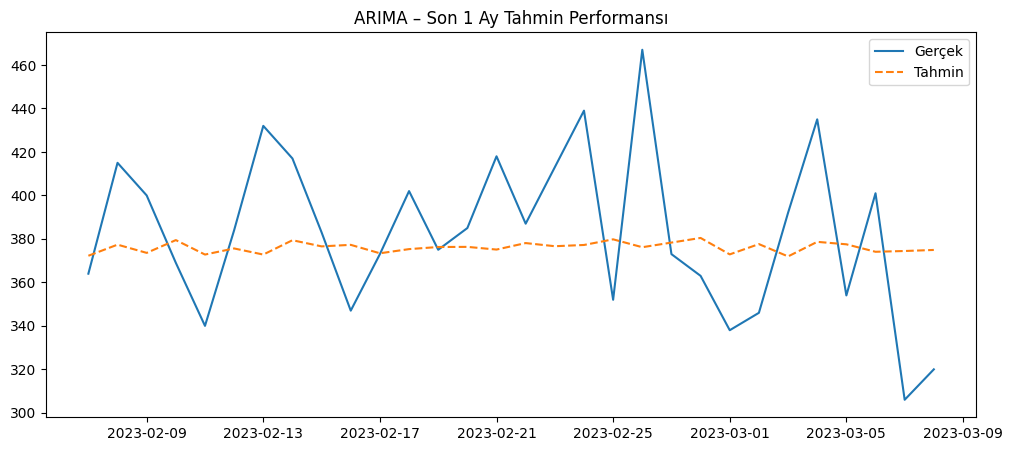

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(results.index, results["Actual"], label="Gerçek")
plt.plot(results.index, results["Predicted"], label="Tahmin", linestyle="--")
plt.title("ARIMA – Son 1 Ay Tahmin Performansı")
plt.legend()
plt.show()


In [ ]:
predictions

[2023-02-07    372.248457
 Freq: D, dtype: float64,
 2023-02-08    377.357491
 Freq: D, dtype: float64,
 2023-02-09    373.574335
 Freq: D, dtype: float64,
 2023-02-10    379.455366
 Freq: D, dtype: float64,
 2023-02-11    372.802139
 Freq: D, dtype: float64,
 2023-02-12    375.609005
 Freq: D, dtype: float64,
 2023-02-13    372.798131
 Freq: D, dtype: float64,
 2023-02-14    379.394277
 Freq: D, dtype: float64,
 2023-02-15    376.562328
 Freq: D, dtype: float64,
 2023-02-16    377.266796
 Freq: D, dtype: float64,
 2023-02-17    373.388019
 Freq: D, dtype: float64,
 2023-02-18    375.304913
 Freq: D, dtype: float64,
 2023-02-19    376.275976
 Freq: D, dtype: float64,
 2023-02-20    376.336848
 Freq: D, dtype: float64,
 2023-02-21    375.096798
 Freq: D, dtype: float64,
 2023-02-22    378.085717
 Freq: D, dtype: float64,
 2023-02-23    376.637022
 Freq: D, dtype: float64,
 2023-02-24    377.208744
 Freq: D, dtype: float64,
 2023-02-25    379.804205
 Freq: D, dtype: float64,
 2023-02-26 

veriyi haftalık olarak resample edelim

In [ ]:
weekly_sales = df["quantity"].resample("W").sum()


In [ ]:
train_end = "2023-02-06"

train_series = weekly_sales.loc[:train_end]
test_series = weekly_sales.loc[train_end:].iloc[1:]  # sonrası


In [ ]:
history = train_series.copy()
predictions = []

order = (1, 1, 1)

for date in test_series.index:
    model = ARIMA(history, order=order)
    model_fit = model.fit()

    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast.iloc[0])

    # Gerçek değeri ekle
    history.loc[date] = test_series.loc[date]


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [ ]:
results = pd.DataFrame({
    "Actual": test_series.values,
    "Predicted": predictions
}, index=test_series.index)

print(results)


              Actual    Predicted
invoice_date                     
2023-02-19      2729  2618.537462
2023-02-26      2861  2638.247238
2023-03-05      2601  2674.343668
2023-03-12      1027  2606.676942


modeli değerlendirelim

In [ ]:
mae = mean_absolute_error(results["Actual"], results["Predicted"])
rmse = np.sqrt(mean_squared_error(results["Actual"], results["Predicted"]))
mape = mean_absolute_percentage_error(results["Actual"], results["Predicted"])

print(f"Weekly MAE  : {mae:.2f}")
print(f"Weekly RMSE : {rmse:.2f}")
print(f"Weekly MAPE : {mape:.2f}")


Weekly MAE  : 496.56
Weekly RMSE : 800.40
Weekly MAPE : 0.42


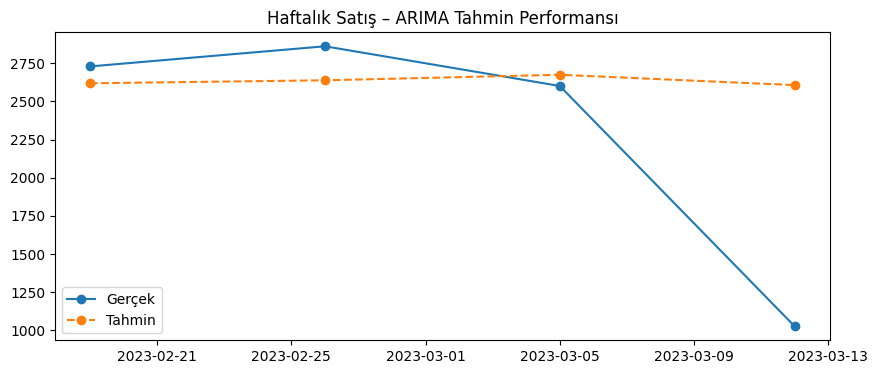

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(results.index, results["Actual"], label="Gerçek", marker="o")
plt.plot(results.index, results["Predicted"], label="Tahmin", marker="o", linestyle="--")
plt.title("Haftalık Satış – ARIMA Tahmin Performansı")
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 32.0 MB/s eta 0:00:00


auto arıma modeli kuralım

In [ ]:
train_end = "2023-02-06"

train_series = weekly_sales.loc[:train_end]
test_series = weekly_sales.loc[train_end:].iloc[1:]


In [ ]:
history = train_series.copy()
predictions = []

for date in test_series.index:

    model = auto_arima(
        history,
        start_p=1, start_q=1,
        max_p=4, max_q=4,
        d=None,              # otomatik fark alma
        seasonal=False,      # haftalıkta şimdilik SARIMA yok
        stepwise=True,
        suppress_warnings=True,
        error_action="ignore"
    )

    forecast = model.predict(n_periods=1)
    predictions.append(forecast)

    # Gerçek değeri train'e ekle
    history.loc[date] = test_series.loc[date]


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
sonuc = results.loc[:"2023-03-05"]

In [ ]:
sonuc

,Actual,Predicted
invoice_date,,
2023-02-19,2729,2618.537462
2023-02-26,2861,2638.247238
2023-03-05,2601,2674.343668


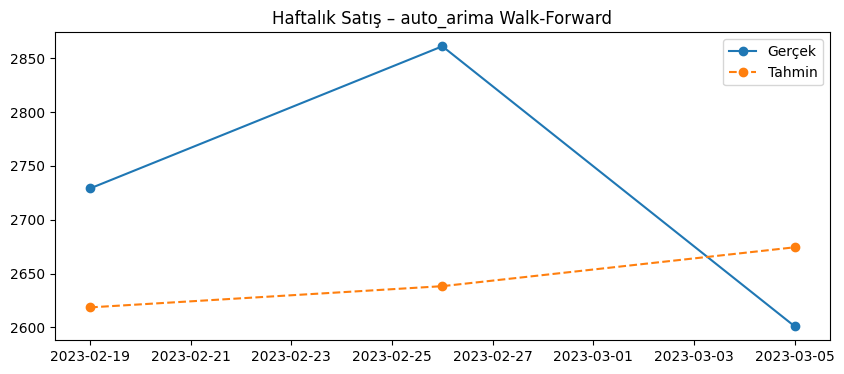

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(sonuc.index, sonuc["Actual"], marker="o", label="Gerçek")
plt.plot(sonuc.index, sonuc["Predicted"], marker="o", linestyle="--", label="Tahmin")
plt.title("Haftalık Satış – auto_arima Walk-Forward")
plt.legend()
plt.show()


In [ ]:
results

,Actual,Predicted
invoice_date,,
2023-02-19,2729,2618.537462
2023-02-26,2861,2638.247238
2023-03-05,2601,2674.343668
2023-03-12,1027,2606.676942


In [ ]:
mae = mean_absolute_error(sonuc["Actual"], sonuc["Predicted"])
rmse = np.sqrt(mean_squared_error(sonuc["Actual"], sonuc["Predicted"]))
mape = mean_absolute_percentage_error(sonuc["Actual"], sonuc["Predicted"])

print(f"Weekly MAE  : {mae:.2f}")
print(f"Weekly RMSE : {rmse:.2f}")
print(f"Weekly Mape : {mape:.2f}")

Weekly MAE  : 135.52
Weekly RMSE : 149.67
Weekly Mape : 0.05


In [ ]:
mae = mean_absolute_error(results["Actual"], results["Predicted"])
rmse = np.sqrt(mean_squared_error(results["Actual"], results["Predicted"]))

print(f"Weekly MAE  : {mae:.2f}")
print(f"Weekly RMSE : {rmse:.2f}")


Weekly MAE  : 496.56
Weekly RMSE : 800.40


**Sarıma model**

In [ ]:
history = train_series.copy()
predictions = []

for date in test_series.index:

    model = auto_arima(
        history,
        start_p=0, start_q=0,
        max_p=2, max_q=2,
        start_P=0, start_Q=0,
        max_P=1, max_Q=1,
        d=None,
        D=1,                 # sezonluk fark
        seasonal=True,
        m=7,
        stepwise=True,
        suppress_warnings=True,
        error_action="ignore",
        trace=False
    )

    forecast = model.predict(n_periods=1)
    predictions.append(forecast)

    # Gerçek değeri history'e ekle
    history.loc[date] = test_series.loc[date]


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
results = pd.DataFrame({
    "Actual": test_series.values,
    "Predicted": predictions
}, index=test_series.index)

print(results)


              Actual                                          Predicted
invoice_date                                                           
2023-02-19      2729  2023-02-12    2703.076385
Freq: W-SUN, dtype: ...
2023-02-26      2861                  111    2659.614016
dtype: float64
2023-03-05      2601                  112    2747.236356
dtype: float64
2023-03-12      1027                  113    2628.713718
dtype: float64


In [ ]:
sonuc = results.loc[:"2023-03-05"]

In [ ]:
mae = mean_absolute_error(sonuc["Actual"], sonuc["Predicted"])
rmse = np.sqrt(mean_squared_error(sonuc["Actual"], sonuc["Predicted"]))
mape = mean_absolute_percentage_error(sonuc["Actual"], sonuc["Predicted"])

print(f"SARIMA Weekly MAE  : {mae:.2f}")
print(f"SARIMA Weekly RMSE : {rmse:.2f}")
print(f"SARIMA Weekly MAPE : {mape:.2f}")


SARIMA Weekly MAE  : 124.52
SARIMA Weekly RMSE : 144.47
SARIMA Weekly MAPE : 0.05


sonuç olarak Sarıma modeli ilk ik arıma modelinden daha doğru sonuçlar verdi